In [ ]:
!pip install yfinance pandas matplotlib seaborn plotly scikit-learn statsmodels prophet keras tensorflow --quiet


In [ ]:
# Import libraries
import yfinance as yf
import pandas as pd

# Define stock symbol and time range
stock_symbol = 'RELIANCE.NS'  # You can change it to 'TCS.NS' or 'AAPL' if you want

# Download historical data from 2015 to 2024
data = yf.download(stock_symbol, start='2015-01-01', end='2024-12-31')

# Display the first 5 rows of the data
data.head()


<ipython-input-2-1936754899>:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2015-01-01,196.682373,197.590585,195.740935,196.327961,2963643
2015-01-02,196.161835,198.487741,195.884950,196.726694,7331366
2015-01-05,194.013153,197.346949,193.625500,196.040009,10103941
2015-01-06,185.207947,193.381821,184.299735,192.717283,18627980
2015-01-07,189.239502,190.236317,185.407314,185.429464,20720312


In [ ]:
# Save the data to a CSV file (optional, for backup)
data.to_csv('stock_data.csv')

# Show shape (rows, columns)
print("Shape of the data (rows, columns):", data.shape)

# Show column names
print("\nColumns in data:", data.columns.tolist())

# Describe the data (mean, min, max, etc.)
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Shape of the data (rows, columns): (2466, 5)

Columns in data: [('Close', 'RELIANCE.NS'), ('High', 'RELIANCE.NS'), ('Low', 'RELIANCE.NS'), ('Open', 'RELIANCE.NS'), ('Volume', 'RELIANCE.NS')]

Summary statistics:
Price         Close         High          Low         Open        Volume
Ticker  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS   RELIANCE.NS
count   2466.000000  2466.000000  2466.000000  2466.000000  2.466000e+03
mean     735.644336   743.693252   728.239625   736.177143  1.843374e+07
std      419.860788   423.766805   416.287138   420.168739  1.355283e+07
min      179.592575   181.132099   176.424925   180.888440  1.705656e+06
25%      322.462563   324.627036   319.978884   322.731365  1.071503e+07
50%      646.785095   656.925916   641.252571   649.872418  1.464605e+07
75%     1125.537262  1137.990828  1116.306733  1127.085971  2.109906e+07
max     1595.484985  1603.358288  1580.137072  1599.022925  1.426834e+08

Missing values in each column:
Price   Ticker     
Close 

In [ ]:
# Simplify column names (remove multi-level indexing)
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Set Date as a column (if needed)
data.reset_index(inplace=True)

# Check result
data.head()


,Date,Close,High,Low,Open,Volume
0,2015-01-01,196.682373,197.590585,195.740935,196.327961,2963643
1,2015-01-02,196.161835,198.487741,195.884950,196.726694,7331366
2,2015-01-05,194.013153,197.346949,193.625500,196.040009,10103941
3,2015-01-06,185.207947,193.381821,184.299735,192.717283,18627980
4,2015-01-07,189.239502,190.236317,185.407314,185.429464,20720312


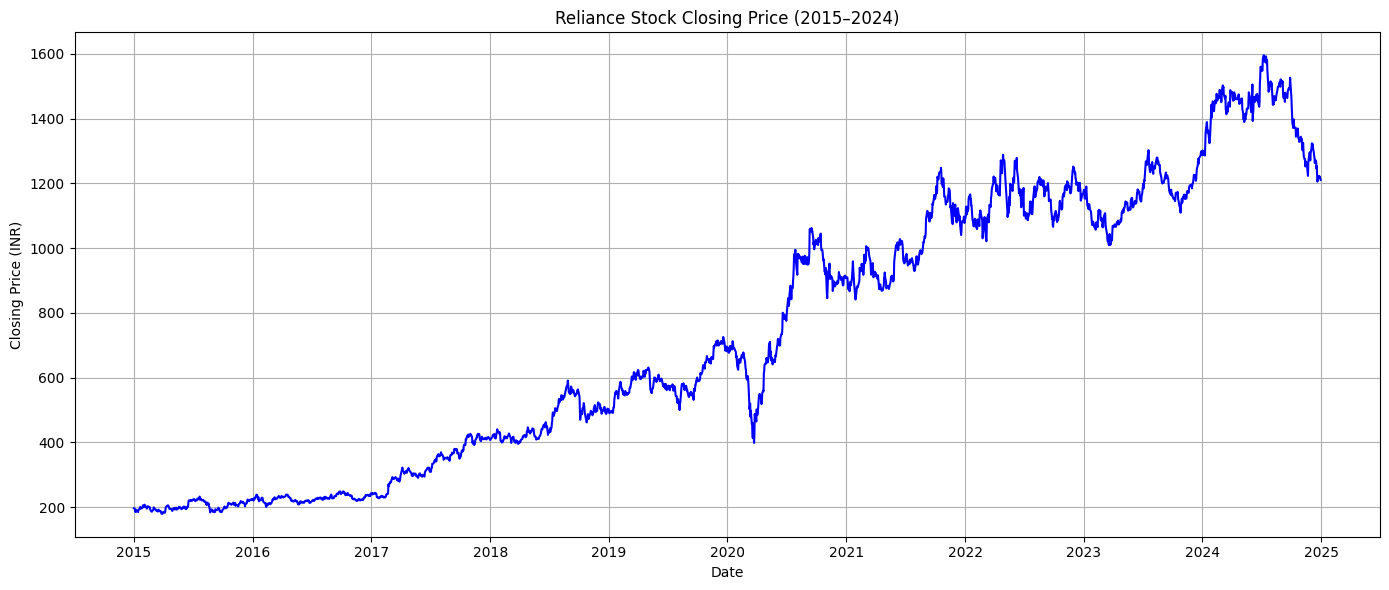

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 6))

# Plot Closing Price
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('Reliance Stock Closing Price (2015–2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


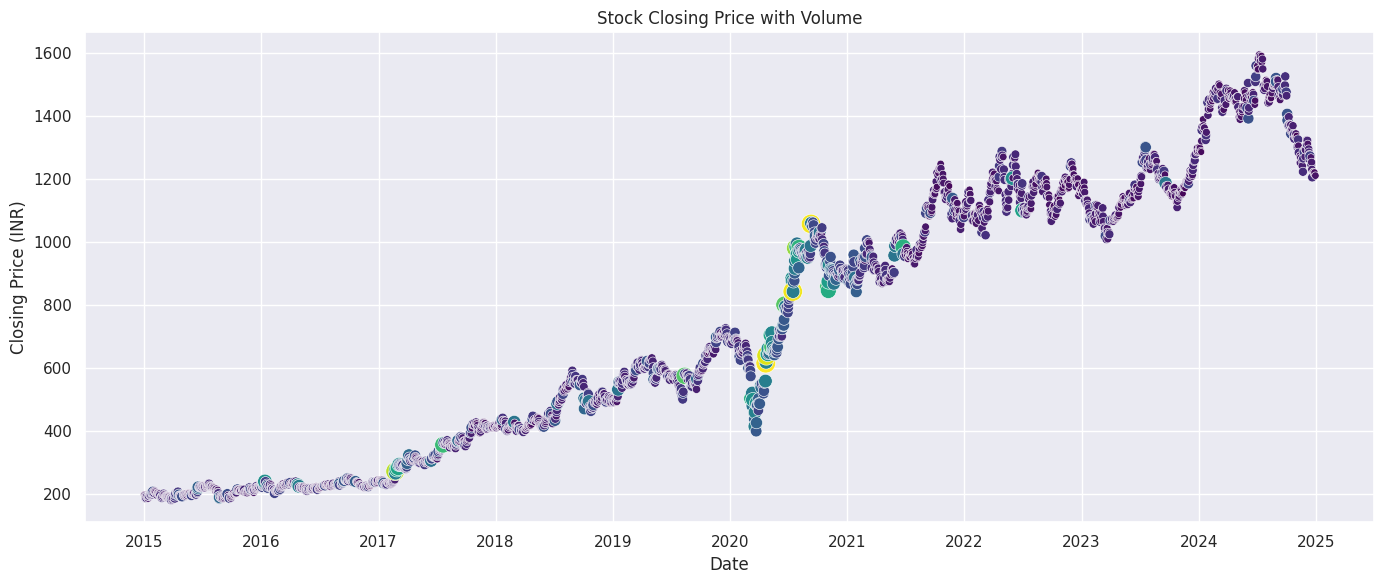

In [ ]:
import seaborn as sns

# Set the theme
sns.set(style="darkgrid")

# Plot Closing Price with volume as color
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='Date', y='Close', size='Volume', sizes=(20, 200), hue='Volume', palette='viridis', legend=False)
plt.title('Stock Closing Price with Volume')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings("ignore")
register_matplotlib_converters()


In [ ]:
# Set Date as index (required for ARIMA)
data.set_index('Date', inplace=True)

# Extract just the 'Close' column
closing_price = data['Close']


In [ ]:
# Build ARIMA model (order = (p, d, q) is (5,1,0) for now)
model = ARIMA(closing_price, order=(5, 1, 0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2466
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9895.073
Date:                Tue, 17 Jun 2025   AIC                          19802.146
Time:                        15:09:16   BIC                          19837.006
Sample:                             0   HQIC                         19814.811
                               - 2466                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0061      0.013     -0.477      0.634      -0.031       0.019
ar.L2          0.0264      0.015      1.816      0.069      -0.002       0.055
ar.L3         -0.0543      0.014     -3.952      0.0

In [ ]:
# Forecast next 60 days
forecast = model_fit.forecast(steps=60)

# Create a new index for future dates
future_dates = pd.date_range(start=closing_price.index[-1], periods=61, freq='B')[1:]  # 'B' = business days

# Create a DataFrame to hold predictions
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': forecast})
forecast_df.set_index('Date', inplace=True)

# Show forecast table
forecast_df.head()


,Predicted Close
Date,
2024-12-31,1211.270164
2025-01-01,1210.822078
2025-01-02,1211.329250
2025-01-03,1211.417333
2025-01-06,1211.413468


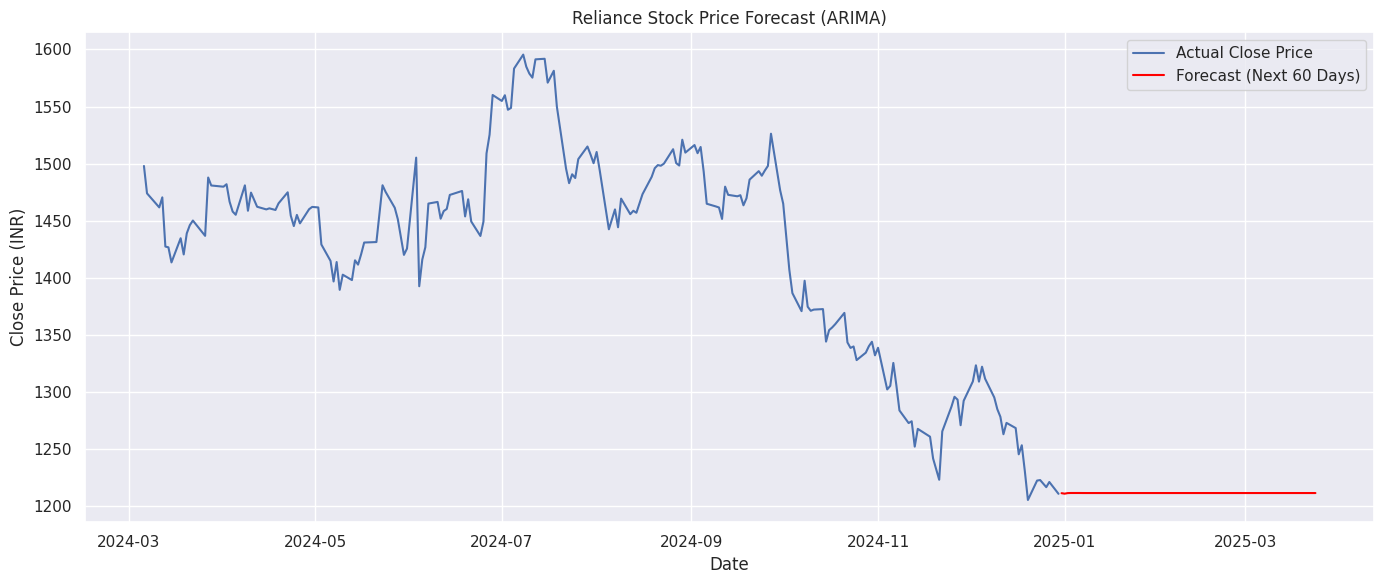

In [ ]:
plt.figure(figsize=(14, 6))

# Plot past data
plt.plot(closing_price[-200:], label='Actual Close Price')

# Plot forecast
plt.plot(forecast_df['Predicted Close'], label='Forecast (Next 60 Days)', color='red')

plt.title('Reliance Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
# Seasonal order: (P, D, Q, s) where s=12 for yearly seasonality (monthly data)
sarima_model = SARIMAX(closing_price, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Print summary
print(sarima_result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2466
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9877.843
Date:                            Tue, 17 Jun 2025   AIC                          19765.686
Time:                                    15:11:29   BIC                          19794.712
Sample:                                         0   HQIC                         19776.234
                                           - 2466                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7965      0.143     -5.576      0.000      -1.077      -0.517
ma.L1          0.7746      0.148   

In [ ]:
# Forecast 60 business days
sarima_forecast = sarima_result.get_forecast(steps=60)
sarima_pred = sarima_forecast.predicted_mean

# Create future dates
future_dates_sarima = pd.date_range(start=closing_price.index[-1], periods=61, freq='B')[1:]

# Create DataFrame
sarima_df = pd.DataFrame({'Date': future_dates_sarima, 'Predicted Close': sarima_pred})
sarima_df.set_index('Date', inplace=True)


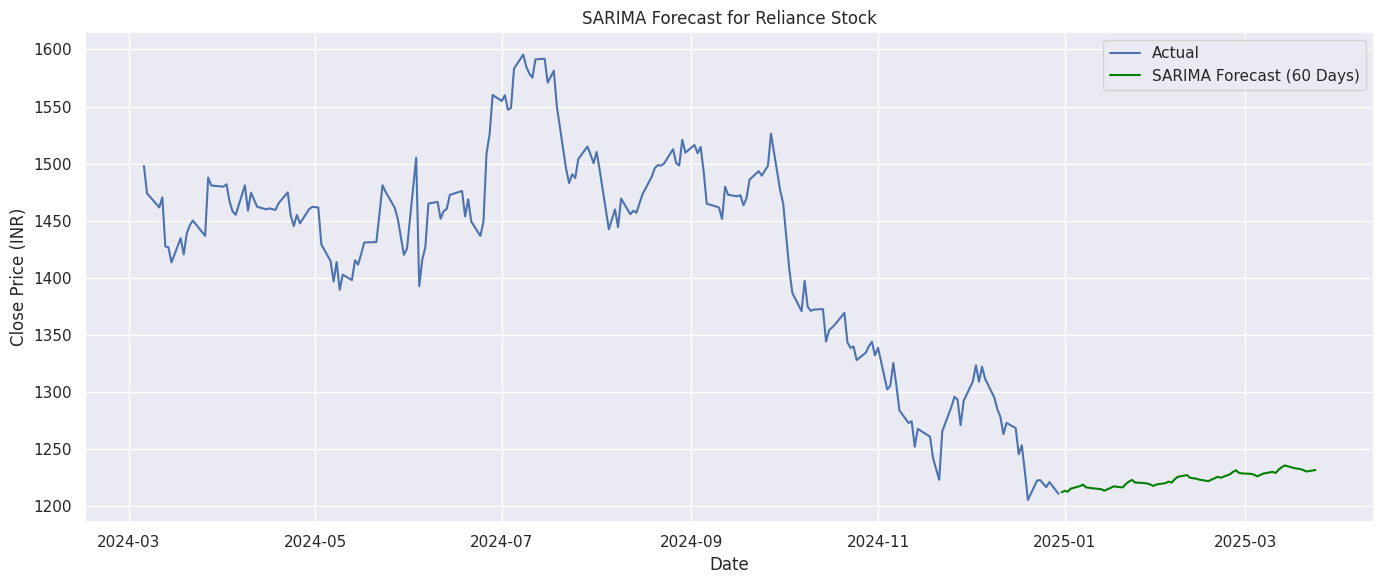

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(closing_price[-200:], label='Actual')
plt.plot(sarima_df['Predicted Close'], label='SARIMA Forecast (60 Days)', color='green')
plt.title('SARIMA Forecast for Reliance Stock')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from prophet import Prophet

# Prepare the DataFrame
prophet_data = closing_price.reset_index()
prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Show result
prophet_data.head()


,ds,y
0,2015-01-01,196.682373
1,2015-01-02,196.161835
2,2015-01-05,194.013153
3,2015-01-06,185.207947
4,2015-01-07,189.239502


In [ ]:
# Create and fit the model
prophet_model = Prophet()
prophet_model.fit(prophet_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleopuhoi/7popydwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleopuhoi/uakdvsyl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50275', 'data', 'file=/tmp/tmpleopuhoi/7popydwl.json', 'init=/tmp/tmpleopuhoi/uakdvsyl.json', 'output', 'file=/tmp/tmpleopuhoi/prophet_model87p9lh5r/prophet_model-20250617151251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:12:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dates for next 60 business days
future = prophet_model.make_future_dataframe(periods=60)

# Predict future values
forecast = prophet_model.predict(future)

# Show forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2521,2025-02-24,1497.120855,1421.683528,1576.944899
2522,2025-02-25,1498.582697,1419.090612,1579.259887
2523,2025-02-26,1497.383735,1419.571311,1580.858578
2524,2025-02-27,1496.448062,1413.696287,1573.872446
2525,2025-02-28,1494.884407,1412.739393,1575.253974


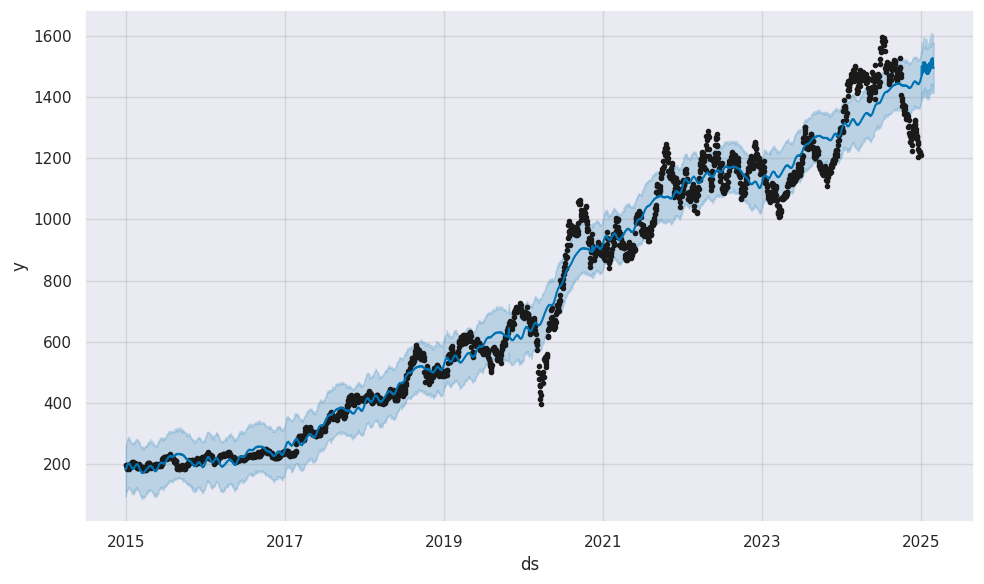

In [ ]:
# Plot the forecast
fig1 = prophet_model.plot(forecast)


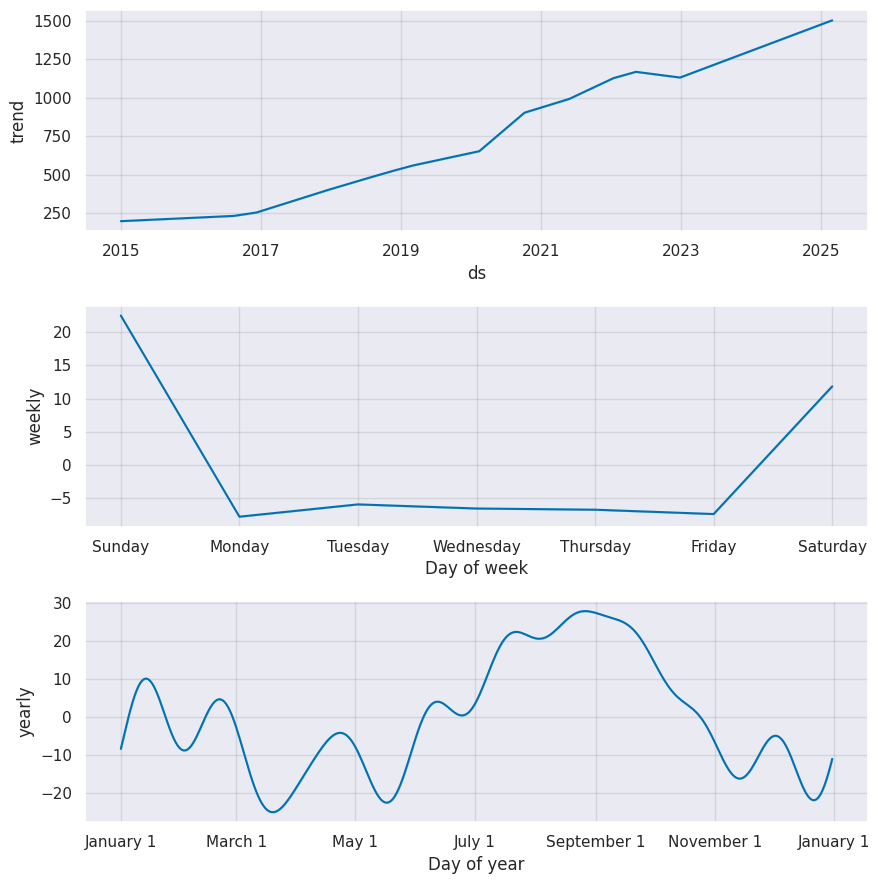

In [ ]:
# Plot trend and seasonality separately
fig2 = prophet_model.plot_components(forecast)


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Convert to numpy array
data_lstm = closing_price.values.reshape(-1, 1)

# Normalize to 0-1 range
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_lstm)


In [ ]:
# Set how many previous days to look at
window_size = 60
X = []
y = []

for i in range(window_size, len(data_scaled)):
    X.append(data_scaled[i-window_size:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Reshape input to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0511
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.7518e-04
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 5.5415e-04
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.4479e-04
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.7175e-04


In [ ]:
# Predict on the training data (just for comparison)
predicted = model.predict(X)

# Inverse transform to original price range
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


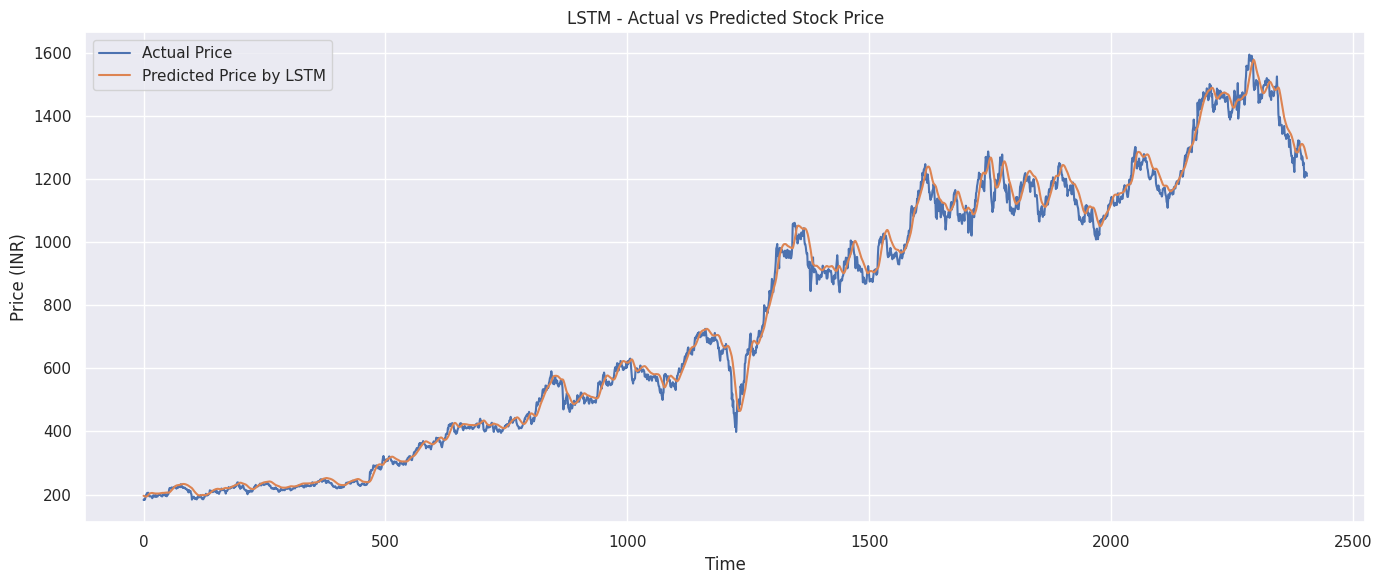

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price by LSTM')
plt.title('LSTM - Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
forecast = model_fit.forecast(steps=60)


In [ ]:
# Reforecast the last 60 actual days (not future)
# We'll use in-sample predictions (dynamic=False to use actual values for prediction)

arima_pred = model_fit.predict(start=len(closing_price)-60, end=len(closing_price)-1, dynamic=False)

# Check for NaN
print("NaNs in prediction:", arima_pred.isnull().sum())


NaNs in prediction: 0


In [ ]:
# Now calculate RMSE between actual and predicted
actual_last_60 = closing_price[-60:]

# Drop any NaNs just in case
arima_pred = arima_pred.dropna()
actual_last_60 = actual_last_60.loc[arima_pred.index]

# Calculate RMSE
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(actual_last_60, arima_pred))
print("ARIMA RMSE:", arima_rmse)


ARIMA RMSE: 17.73394892496458


In [ ]:
# In-sample prediction using SARIMA on last 60 actual days
sarima_pred_insample = sarima_result.predict(start=len(closing_price)-60, end=len(closing_price)-1)

# Drop any NaNs
sarima_pred_insample = sarima_pred_insample.dropna()

# Get actual values for the same period
actual_sarima = closing_price[-60:]
actual_sarima = actual_sarima.loc[sarima_pred_insample.index]

# Calculate RMSE
from sklearn.metrics import mean_squared_error
sarima_rmse = np.sqrt(mean_squared_error(actual_sarima, sarima_pred_insample))
print("SARIMA RMSE:", sarima_rmse)



SARIMA RMSE: 17.925537423613672


In [ ]:
from prophet import Prophet

# Prepare data
prophet_data = closing_price.reset_index()
prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Re-train Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleopuhoi/j093ni16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpleopuhoi/mfczaulr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5952', 'data', 'file=/tmp/tmpleopuhoi/j093ni16.json', 'init=/tmp/tmpleopuhoi/mfczaulr.json', 'output', 'file=/tmp/tmpleopuhoi/prophet_modelvxfzmc4c/prophet_model-20250617152119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make future dataframe including only till today
future = prophet_model.make_future_dataframe(periods=0)

# Predict on full known data
forecast = prophet_model.predict(future)

# Get last 60 predicted values
prophet_pred_60 = forecast.set_index('ds')['yhat'][-60:]

# Get actual last 60 values
actual_60 = closing_price[-60:]

# Align indexes
actual_60 = actual_60.loc[prophet_pred_60.index]


In [ ]:
from sklearn.metrics import mean_squared_error

prophet_rmse = np.sqrt(mean_squared_error(actual_60, prophet_pred_60))
print("Prophet RMSE:", prophet_rmse)


Prophet RMSE: 147.7255168049872


In [ ]:
lstm_rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
print("LSTM RMSE:", lstm_rmse)



LSTM RMSE: 32.05853863711695
